#  1.0-eda.ipynb
#  ---------------------------------------------
#  Exploratory Data Analysis (EDA) for Diabetes Risk Prediction
#  ---------------------------------------------

In [ ]:
# 1️ Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from loguru import logger

In [3]:
# Set plotting style
sns.set_theme(style="whitegrid")

In [ ]:
# 2️ Load Data
from aegis_health_ml.config import INTERIM_DATA_DIR
logger.info(f"Loading dataset from {INTERIM_DATA_DIR}")
df = pd.read_csv(INTERIM_DATA_DIR)

2026-01-18 05:35:07.586 | INFO     | __main__:<module>:4 - Loading dataset from /home/habtemariam/Documents/ML/aegis-health/aegis-health-ml/data/interim/diabetes_interim.csv


In [ ]:
# 3️ Basic Information
logger.info("Dataset Info:")
print(df.info())

2026-01-18 05:35:30.055 | INFO     | __main__:<module>:2 - Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB
None


In [8]:
logger.info("Dataset Head:")
print(df.head())

2026-01-18 05:36:09.404 | INFO     | __main__:<module>:1 - Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000  165.941157  33.6   
1          1.0     85.0           66.0      29.000000   60.705334  26.6   
2          8.0    183.0           64.0      26.111667  172.186312  23.3   
3          1.0     89.0           66.0      23.000000   94.000000  28.1   
4          0.0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


In [9]:
logger.info("Missing Values per Column:")
print(df.isna().sum())

2026-01-18 05:36:32.300 | INFO     | __main__:<module>:1 - Missing Values per Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
logger.info("Descriptive Statistics:")
print(df.describe())

2026-01-18 05:36:56.682 | INFO     | __main__:<module>:1 - Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.589646      72.379995      29.119900  153.458340   
std       3.369578   30.513820      12.206163       9.450134   98.692969   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      23.000000   88.000000   
50%       3.000000  117.000000      72.000000      29.000000  133.925044   
75%       6.000000  140.250000      80.000000      35.000000  189.913787   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.430164                  0.471876   33.240885    0.348958  
std      6.885260     

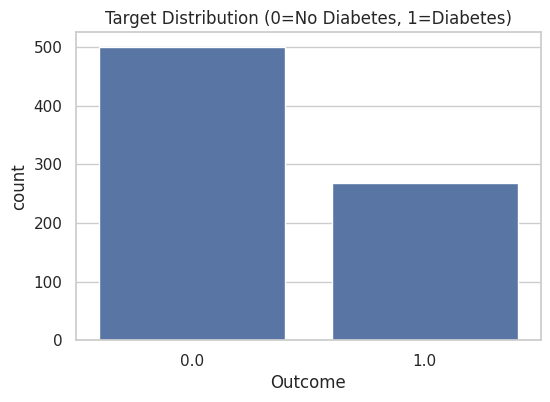

In [ ]:
# 4️ Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Outcome", data=df)
plt.title("Target Distribution (0=No Diabetes, 1=Diabetes)")
plt.show()

In [12]:
# 5️⃣ Visualize Numerical Features
numerical_features = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

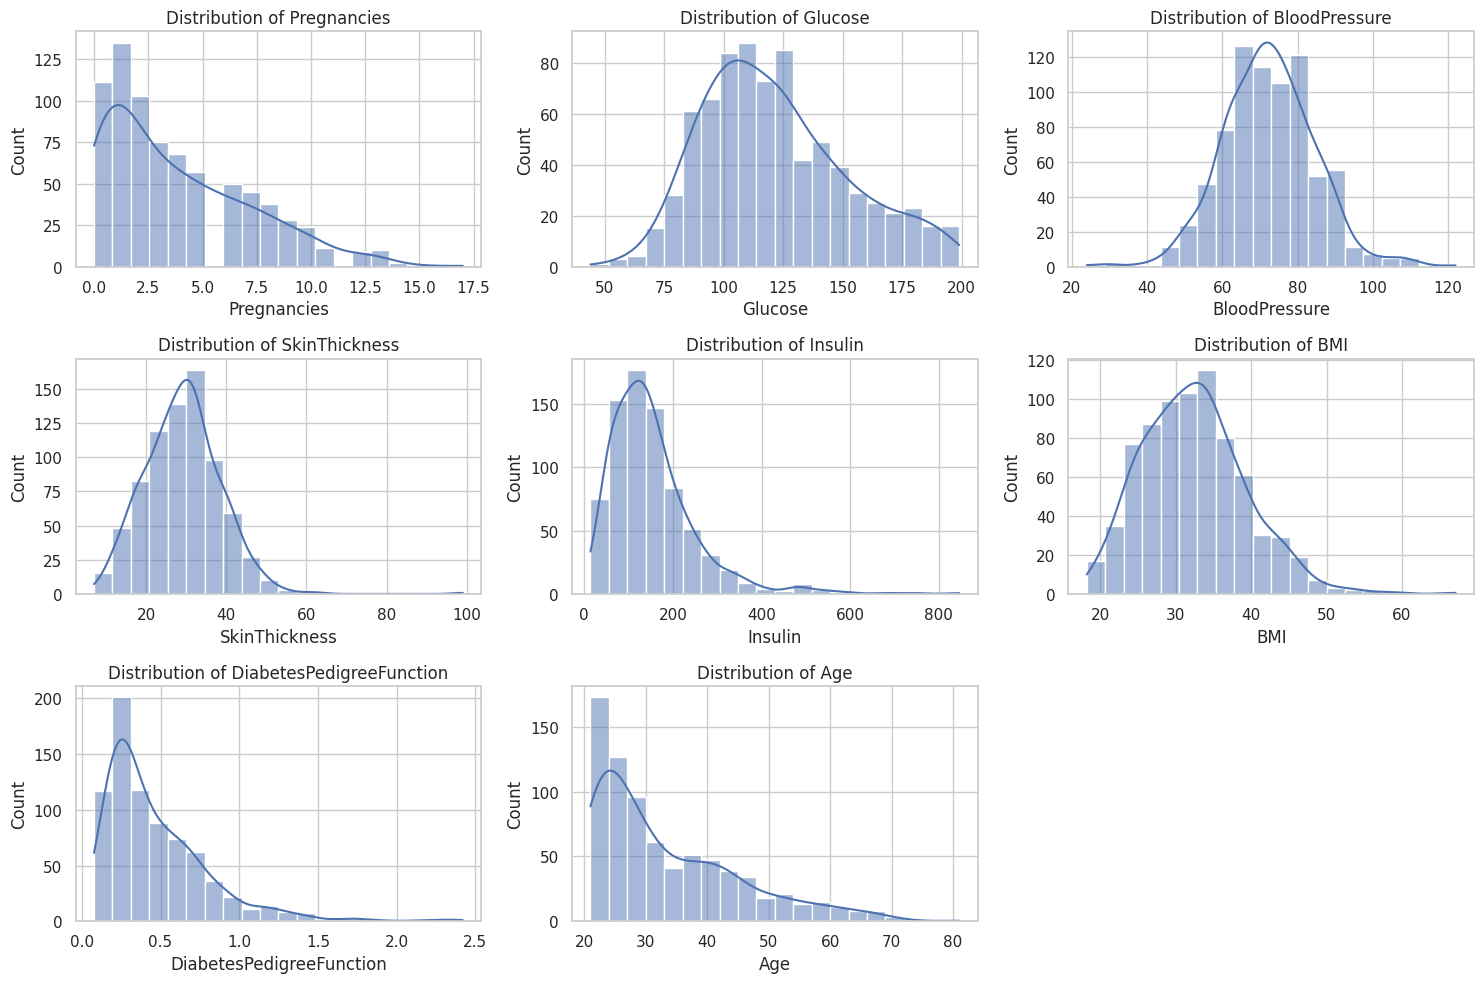

In [13]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

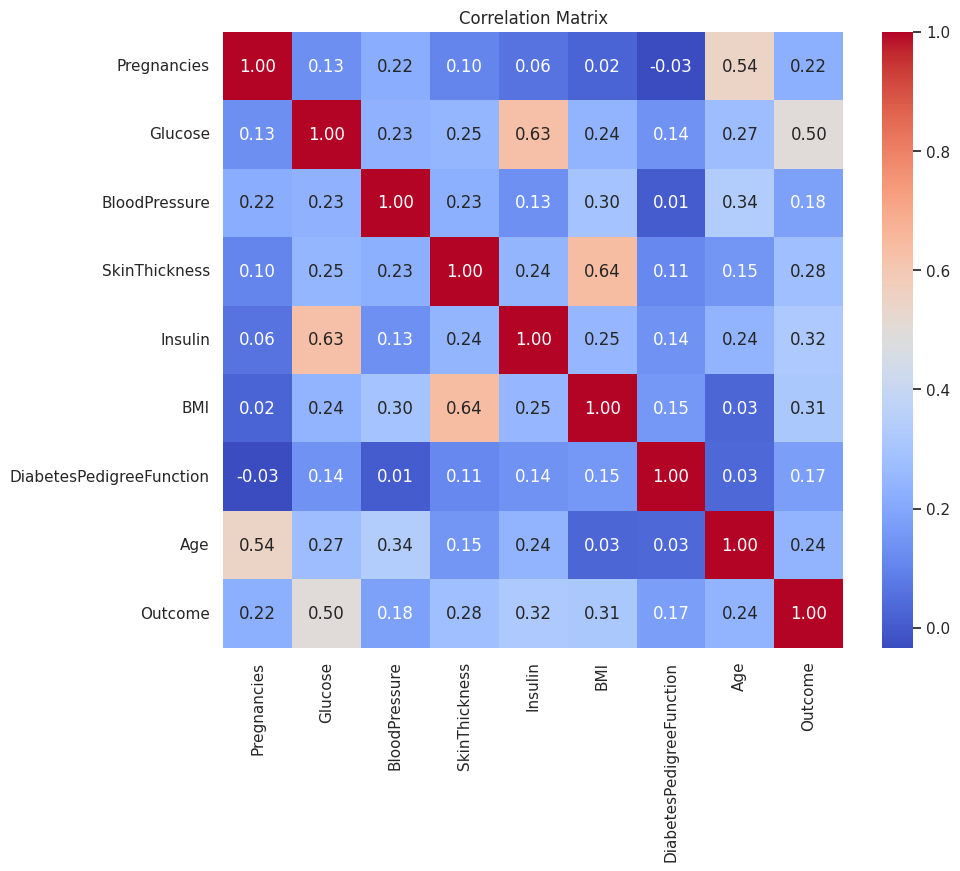

In [ ]:
# 6️ Correlation Analysis
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 7️ Feature Engineering Ideas
# BMI Categories
df["BMI_Category"] = pd.cut(
    df["BMI"],
    bins=[0, 18.5, 25, 30, np.inf],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

# Age Groups
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 30, 45, 60, np.inf],
    labels=["Young", "Middle", "Senior", "Elder"]
)

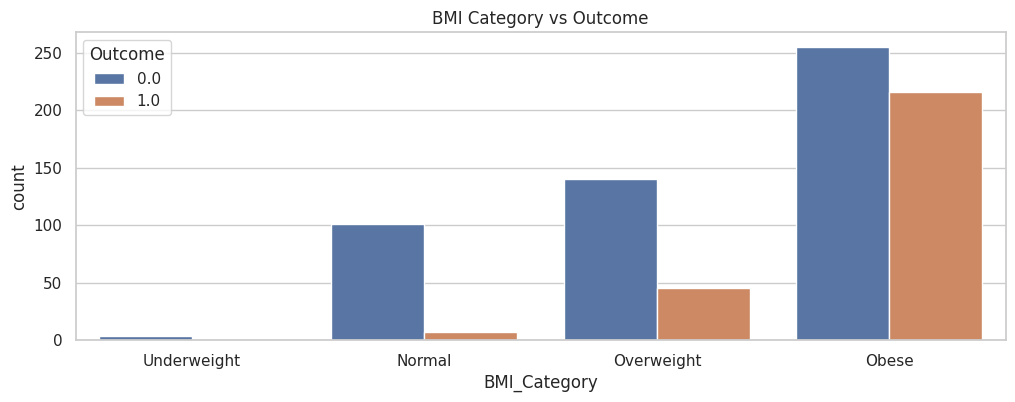

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(x="BMI_Category", hue="Outcome", data=df)
plt.title("BMI Category vs Outcome")
plt.show()

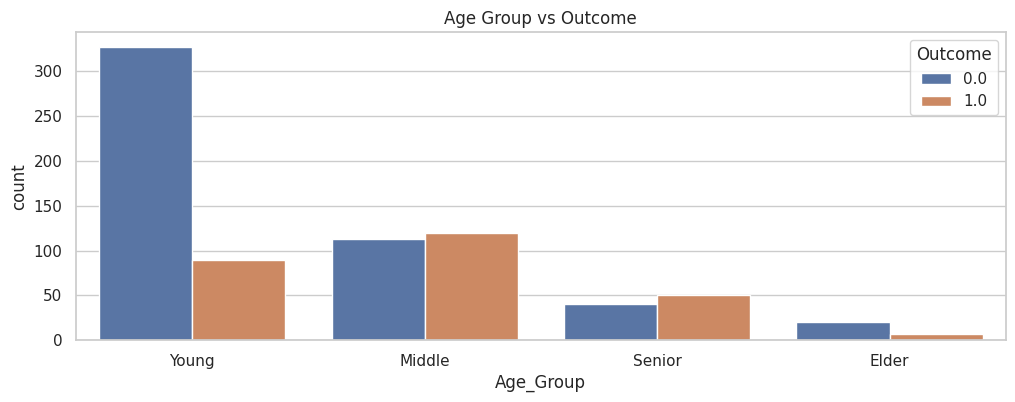

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(x="Age_Group", hue="Outcome", data=df)
plt.title("Age Group vs Outcome")
plt.show()